In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cmocean as cm
import xarray as xr
from datetime import datetime
import os
import math

%matplotlib inline

from salishsea_tools import visualisations as vis

In [2]:
def make_prefix(date, path, res):
    """Construct path prefix for local SalishSeaCast results given date object and paths dict
    e.g., /results2/SalishSea/nowcast-green.201905/daymonthyear/SalishSea_1d_yyyymmdd_yyyymmdd
    """

    datestr = '_'.join(np.repeat(date.strftime('%Y%m%d'), 2))
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, f'{folder}/SalishSea_1{res}_{datestr}')
    
    return prefix

In [3]:
#define paths
NEMO = '/results2/SalishSea/nowcast-green.201905/'
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
thalweg_in = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'

coords = xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask=xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/mesh_mask201702.nc')

### Summer - typical estuarine flow

In [4]:
day = datetime(2020, 6, 1)

x_size_of_plot = 11
y_size_of_plot = 10
stepsize = 0.1
do_I_want_to_save_fig = False
titlefontsize = 20
cbarfontsize = 18
cbartickfontsize = 18
axistickfontsize = 18

In [5]:
# plotXR = xr.open_dataset(make_prefix(day,NEMO,'h')+'_grid_U.nc')
# plotXR = plotXR.resample(time_counter="D").mean(dim="time_counter")

# nc_file = "grid_U.nc"
# plotXR.to_netcdf(nc_file)

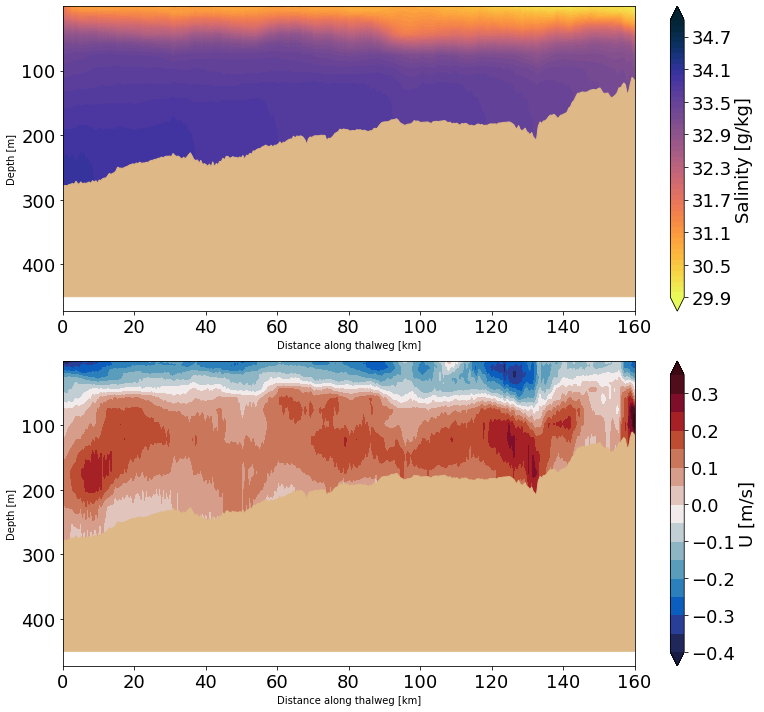

In [6]:
#SUMMER
tit = 'Typical Estuarine Flow'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(29.9, 35, stepsize), cmap = cm.cm.thermal_r, thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,160)
#ax1.set_ylim(120,0)

# #temerature
# nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
# variable_to_plot = 'votemper' 
# data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

# cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh,np.arange(6, 12, stepsize), cmap = cm.cm.thermal, thalweg_file=thalweg_in)
# #ax1.set_title(tit , fontsize = titlefontsize)
# cbar.set_label('Temperature [deg C]', fontsize = cbarfontsize)
# cbar.ax.tick_params(labelsize=cbartickfontsize) 
# ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
# ax2.set_xlim(0,269)
# #ax1.set_ylim(120,0)

#velocity
nc_to_plot = nc.Dataset('grid_U.nc')
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.4, 0.4, 0.05), cmap = cm.cm.balance, thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,160)
# #ax2.set_ylim(120,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

#### Just top 150 m (typically little to no perceivable motion bellow this in ocean parcels run)

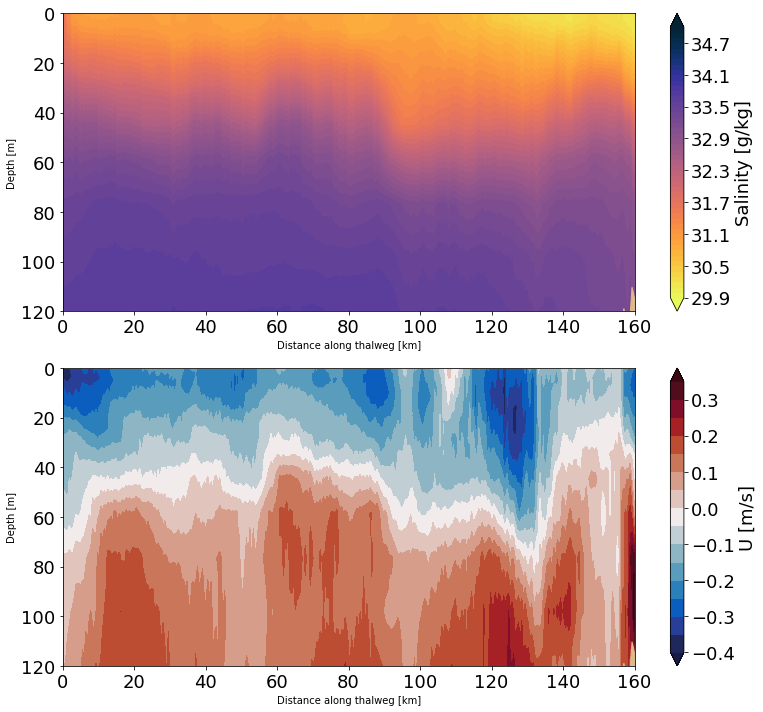

In [7]:
#SUMMER
tit = 'Typical Estuarine Flow'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(29.9, 35, stepsize), cmap = cm.cm.thermal_r, thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,160)
ax1.set_ylim(120,0)

# #temerature
# nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
# variable_to_plot = 'votemper' 
# data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

# cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh,np.arange(6, 12, stepsize), cmap = cm.cm.thermal, thalweg_file=thalweg_in)
# #ax1.set_title(tit , fontsize = titlefontsize)
# cbar.set_label('Temperature [deg C]', fontsize = cbarfontsize)
# cbar.ax.tick_params(labelsize=cbartickfontsize) 
# ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
# ax2.set_xlim(0,269)
# ax2.set_ylim(120,0)

#velocity
nc_to_plot = nc.Dataset('grid_U.nc')
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.4, 0.4, 0.05), cmap = cm.cm.balance, thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,160)
ax2.set_ylim(120,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

## Reverse Flow

In [8]:
day = datetime(2020, 1, 19)
#tested
#Jan 4 
#Jan 5
#Jan 6
#Jan 21 
#jan 19 #BEST
#jan 20

do_I_want_to_save_fig = False

In [9]:
# plotXR = xr.open_dataset(make_prefix(day,NEMO,'h')+'_grid_U.nc')
# plotXR = plotXR.resample(time_counter="D").mean(dim="time_counter")

nc_file = "grid_U_r_"+day.strftime('%Y%m%d')+'.nc'
# plotXR.to_netcdf(nc_file)

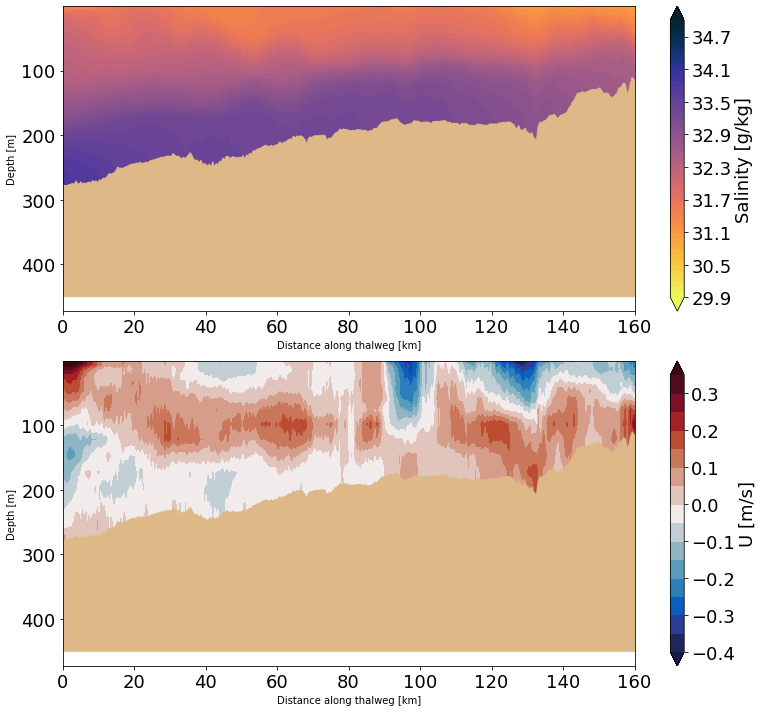

In [10]:
#REVERSE
tit = 'Reverse Flow'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(29.9, 35, stepsize), cmap = cm.cm.thermal_r, thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,160)
#ax1.set_ylim(120,0)

#velocity
nc_to_plot = nc.Dataset(nc_file)
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.4, 0.4, 0.05), cmap = cm.cm.balance, thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,160)
# #ax2.set_ylim(120,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

### Doesn't really look like thalweg plot is as relevent for the reverse flow 
(reverse flow goes along southern coast but thalweg for the most part is in the middle) - lets try some cross sections along the JDF <br>
try to make cross-section plots based on Tereza's code here https://github.com/SalishSeaCast/analysis_tereza/blob/master/notebooks/RIVER_PAPER/201905_analysis/JdF_flux/JDF_water_coming_in_analysis-anomaly_fluxes.ipynb

In [11]:
nc_to_plot = nc.Dataset(nc_file)
variable_to_plot = 'vozocrtx'
fact=0.7

<ipython-input-12-a274b34712bd>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
<ipython-input-12-a274b34712bd>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \


Text(5, 250, 'Olympic \n Penninsula')

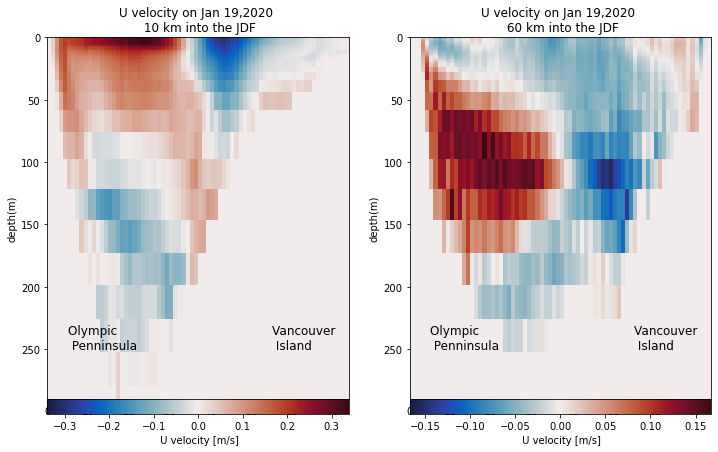

In [12]:
fig, [ax1,ax2]= plt.subplots(nrows=1, ncols=2, figsize =(17*fact,10*fact))

data_to_plot = nc_to_plot[variable_to_plot][0,:,385:(385+75),10]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax1.set_title('U velocity on Jan 19,2020 \n 10 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

# ##############

data_to_plot = nc_to_plot[variable_to_plot][0,:,317:(317+75),60]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax2.set_title('U velocity on Jan 19,2020 \n 60 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

<ipython-input-13-9d334be18ac2>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
<ipython-input-13-9d334be18ac2>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \


Text(5, 250, 'Olympic \n Penninsula')

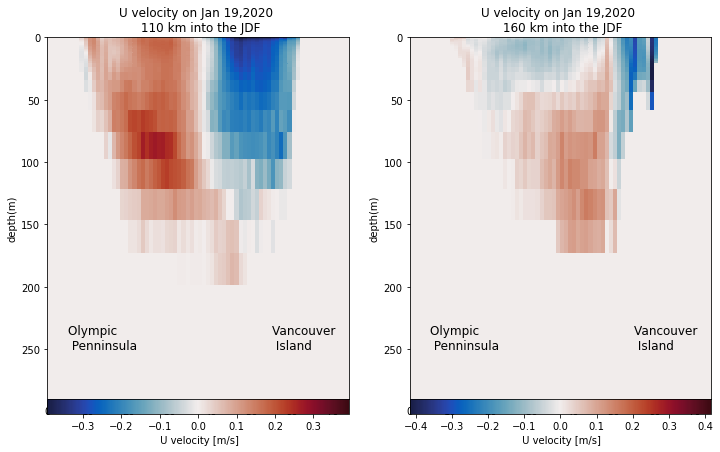

In [13]:
fig, [ax1,ax2]= plt.subplots(nrows=1, ncols=2, figsize =(17*fact,10*fact))

data_to_plot = nc_to_plot[variable_to_plot][0,:,270:(270+75),110]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax1.set_title('U velocity on Jan 19,2020 \n 110 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

# ##############

data_to_plot = nc_to_plot[variable_to_plot][0,:,232:(232+75),160]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax2.set_title('U velocity on Jan 19,2020 \n 160 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

#### probably worthwile to so salinity cross sections too and from that make an attemp to do a salinity-circulation classification

In [14]:
day = datetime(2020, 1, 19)
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline'
fact=0.7

Text(5, 250, 'Olympic \n Penninsula')

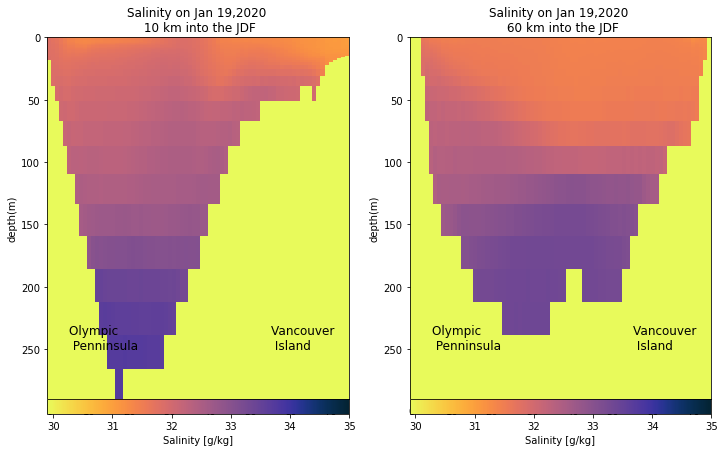

In [15]:
fig, [ax1,ax2]= plt.subplots(nrows=1, ncols=2, figsize =(17*fact,10*fact))

data_to_plot = nc_to_plot[variable_to_plot][0,:,385:(385+75),10]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.thermal_r, shading='auto',\
                      vmin = 29.9, vmax = 35)
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label='Salinity [g/kg]')
ax1.set_title('Salinity on Jan 19,2020 \n 10 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

# ##############

data_to_plot = nc_to_plot[variable_to_plot][0,:,317:(317+75),60]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.thermal_r,shading='auto', \
                      vmin = 29.9, vmax = 35)
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label='Salinity [g/kg]')
ax2.set_title('Salinity on Jan 19,2020 \n 60 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

Text(5, 250, 'Olympic \n Penninsula')

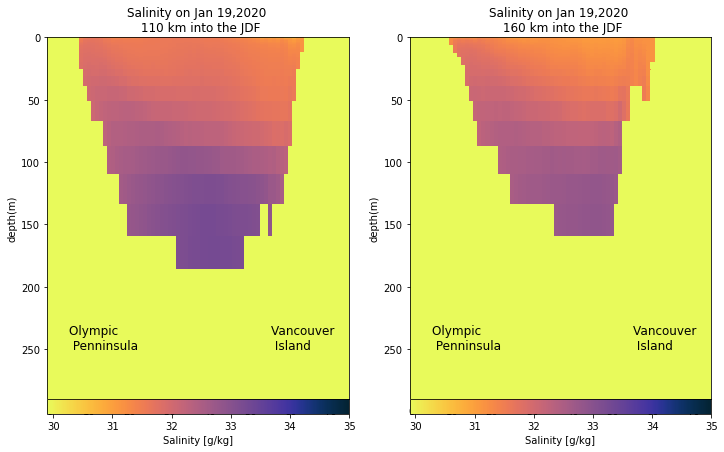

In [16]:
fig, [ax1,ax2]= plt.subplots(nrows=1, ncols=2, figsize =(17*fact,10*fact))

data_to_plot = nc_to_plot[variable_to_plot][0,:,270:(270+75),110]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.thermal_r, shading='auto',\
                      vmin = 29.9, vmax = 35)
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label='Salinity [g/kg]')
ax1.set_title('Salinity on Jan 19,2020 \n 110 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

# ##############

data_to_plot = nc_to_plot[variable_to_plot][0,:,232:(232+75),160]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.thermal_r,shading='auto', \
                      vmin = 29.9, vmax = 35)
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label='Salinity [g/kg]')
ax2.set_title('Salinity on Jan 19,2020 \n 160 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

### For comparison's sake we should PROBABLY also make these figures for the the estuarine flow time

In [17]:
nc_to_plot = nc.Dataset("grid_U.nc")
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,361:(361+75),20]
# data_to_plot[:,37]
fact=0.7

<ipython-input-18-3df7fd097e75>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
<ipython-input-18-3df7fd097e75>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \


Text(5, 250, 'Olympic \n Penninsula')

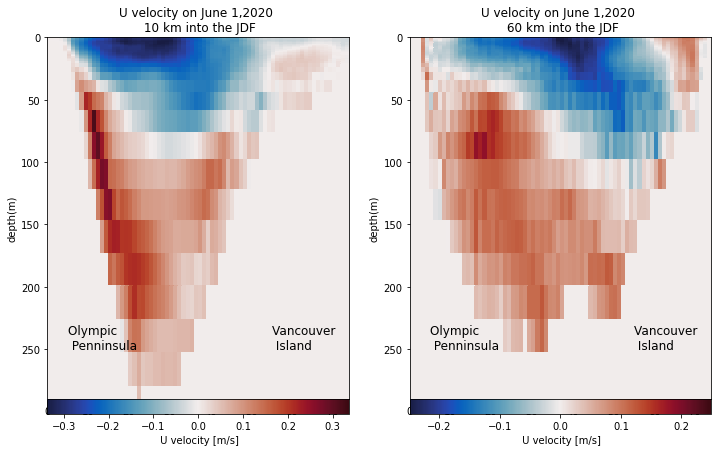

In [18]:
fig, [ax1,ax2]= plt.subplots(nrows=1, ncols=2, figsize =(17*fact,10*fact))

data_to_plot = nc_to_plot[variable_to_plot][0,:,380:(380+75),10]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax1.set_title('U velocity on June 1,2020 \n 10 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

# ##############

data_to_plot = nc_to_plot[variable_to_plot][0,:,317:(317+75),60]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax2.set_title('U velocity on June 1,2020 \n 60 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

<ipython-input-19-af591b9d41db>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
<ipython-input-19-af591b9d41db>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \


Text(5, 250, 'Olympic \n Penninsula')

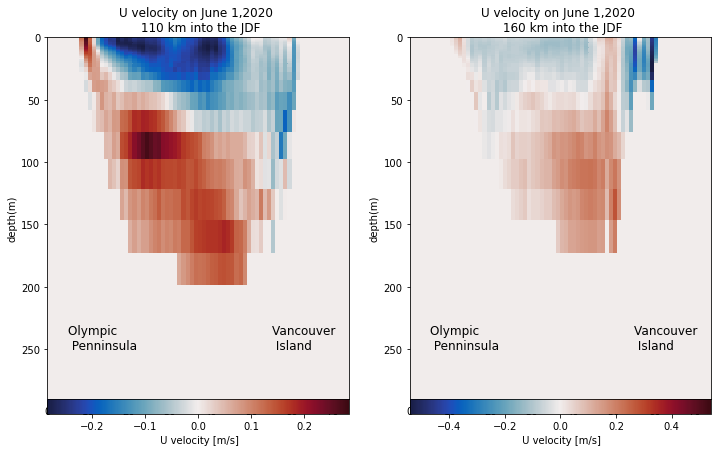

In [19]:
fig, [ax1,ax2]= plt.subplots(nrows=1, ncols=2, figsize =(17*fact,10*fact))

data_to_plot = nc_to_plot[variable_to_plot][0,:,270:(270+75),110]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax1.set_title('U velocity on June 1,2020 \n 110 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

# ##############

data_to_plot = nc_to_plot[variable_to_plot][0,:,232:(232+75),160]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax2.set_title('U velocity on June 1,2020 \n 160 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

#### Salinity too

In [20]:
day = datetime(2020, 6, 1)
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline'
fact=0.7

Text(5, 250, 'Olympic \n Penninsula')

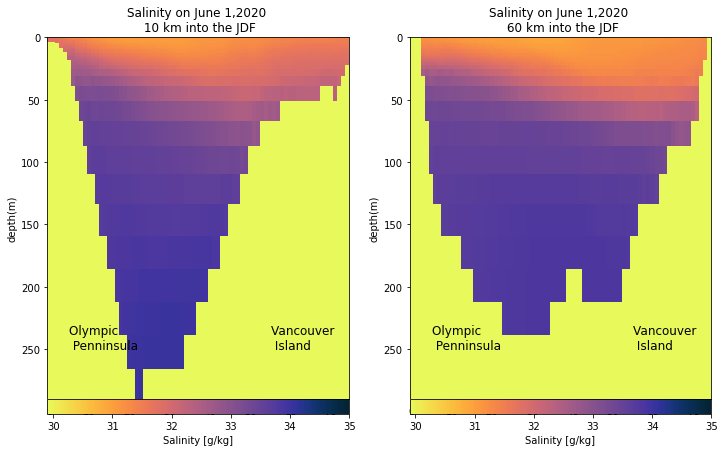

In [21]:
fig, [ax1,ax2]= plt.subplots(nrows=1, ncols=2, figsize =(17*fact,10*fact))

data_to_plot = nc_to_plot[variable_to_plot][0,:,380:(380+75),10]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.thermal_r, shading='auto',\
                      vmin = 29.9, vmax = 35)
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label='Salinity [g/kg]')
ax1.set_title('Salinity on June 1,2020 \n 10 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

# ##############

data_to_plot = nc_to_plot[variable_to_plot][0,:,317:(317+75),60]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.thermal_r,shading='auto', \
                      vmin = 29.9, vmax = 35)
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label='Salinity [g/kg]')
ax2.set_title('Salinity on June 1,2020 \n 60 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

Text(5, 250, 'Olympic \n Penninsula')

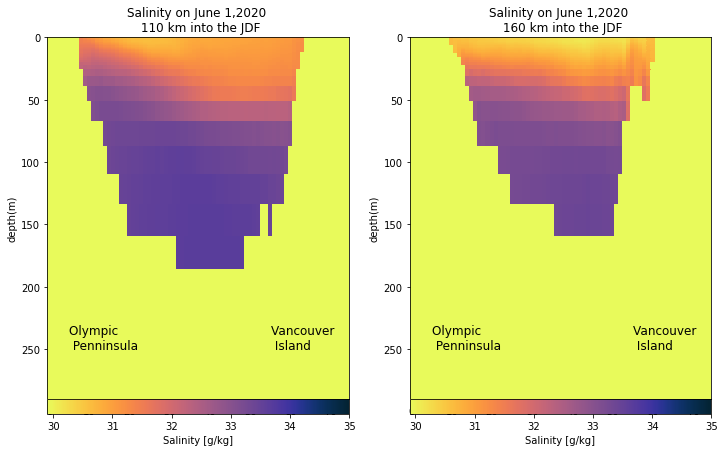

In [22]:
fig, [ax1,ax2]= plt.subplots(nrows=1, ncols=2, figsize =(17*fact,10*fact))

data_to_plot = nc_to_plot[variable_to_plot][0,:,270:(270+75),110]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.thermal_r, shading='auto',\
                      vmin = 29.9, vmax = 35)
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label='Salinity [g/kg]')
ax1.set_title('Salinity on June 1,2020 \n 110 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

# ##############

data_to_plot = nc_to_plot[variable_to_plot][0,:,232:(232+75),160]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.thermal_r,shading='auto', \
                      vmin = 29.9, vmax = 35)
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label='Salinity [g/kg]')
ax2.set_title('Salinity on June 1,2020 \n 160 km into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

## Study Area

In [23]:
def plot_thalweg(ax, T_lon, T_lat):
    lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
    lines = lines.astype(int)

    thalweg_lon = T_lon[lines[:,0],lines[:,1]]
    thalweg_lat = T_lat[lines[:,0],lines[:,1]]
    ax.plot(thalweg_lon, thalweg_lat, 'r')

Text(0, 0.5, 'Latitude')

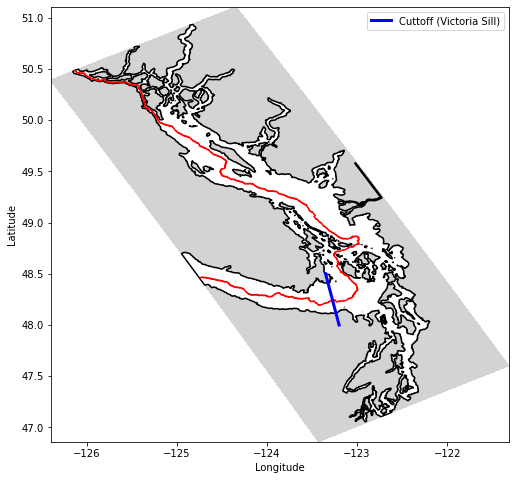

In [24]:
# Plot Basemap
x, y = coords.nav_lon.values, coords.nav_lat.values

fig, ax = plt.subplots(figsize=(19, 8))
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#ax.set_xlim([-124.8, -122.7])
#ax.set_ylim([48, 49.2])
ax.set_aspect(5/4.4)
nmin, nmax = 0, -1

plot_thalweg(ax, x, y)

# Box around model domain
ax.plot([-123.35,-123.2], [48.5, 48], 'b-',zorder=6, label="Cuttoff (Victoria Sill)", linewidth=3.0)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Density calcs based on unesco formula

In [25]:
a0 = 999.842594
a1 = 6.793952 * 10**-2
a2 = -9.095290 * 10**-3
a3 = 1.001685 * 10**-4
a4 = -1.120083 * 10**-6
a5 = 6.536332 * 10**-9

b0 = 0.824493
b1 = -4.0899*10**-3
b2 = 7.6438*10**-5
b3 = -8.2467*10**-7
b4 = 5.3875*10**-9
c0 = -5.72466*10**-3
c1 = 1.0227*10**-4
c2 = -1.6546*10**-6
d0 = 4.8314*10**-4

##### Estuarine

In [26]:
Sr = 29.9 #from NEMO
Socn = 34.5 #from NEMO
Tr = 12 #from NEMO
Tocn = 7 #from NEMO

b = b0+(b1*Tr)+(b2*Tr**2)+(b3*Tr**3)+(b4*Tr**4)
c = c0+(c1*Tr)+(c2*Tr**2)
rhoR = (a0)+(a1*Tr)+(a2*Tr**2)+(a3*Tr**3)+(a4*Tr**4)+(a5*Tr**5) + b*Sr + c*Sr**(3/2) + d0*Sr**2
print(rhoR)

b = b0+(b1*Tocn)+(b2*Tocn**2)+(b3*Tocn**3)+(b4*Tocn**4)
c = c0+(c1*Tocn)+(c2*Tocn**2)
rhoOcn = (a0)+(a1*Tocn)+(a2*Tocn**2)+(a3*Tocn**3)+(a4*Tocn**4)+(a5*Tocn**5) + b*Socn + c*Socn**(3/2) + d0*Socn**2
print(rhoOcn)

1022.6320334676441
1027.0251262718878


In [27]:
g = 9.8 #m/s2
H = 120 #m
B = 25000 #m
Ut = ((160/4)*1000)/(60*60) #m/s
print(Ut)
Ur = 0.25 #from NEMO

# c = math.sqrt(g*((rhoOcn-rhoR)/rhoOcn)*H) 
c = math.sqrt(g*Socn*H*(7.7*10**-4))
print(c)

Ft_real = math.sqrt(B/H)*(Ut/c)
print(Ft_real)
Fr_real = Ur/c
print(Fr_real)

11.11111111111111
5.589314805948937
28.69315476813048
0.04472820169905527


##### Transient - data from cross section plots instead of thalweg

In [28]:
Sr = 31
Socn = 33.5
Tr = 12 #from NEMO
Tocn = 7 #from NEMO

b = b0+(b1*Tr)+(b2*Tr**2)+(b3*Tr**3)+(b4*Tr**4)
c = c0+(c1*Tr)+(c2*Tr**2)
rhoR = (a0)+(a1*Tr)+(a2*Tr**2)+(a3*Tr**3)+(a4*Tr**4)+(a5*Tr**5) + b*Sr + c*Sr**(3/2) + d0*Sr**2
print(rhoR)

b = b0+(b1*Tocn)+(b2*Tocn**2)+(b3*Tocn**3)+(b4*Tocn**4)
c = c0+(c1*Tocn)+(c2*Tocn**2)
rhoOcn = (a0)+(a1*Tocn)+(a2*Tocn**2)+(a3*Tocn**3)+(a4*Tocn**4)+(a5*Tocn**5) + b*Socn + c*Socn**(3/2) + d0*Socn**2
print(rhoOcn)

1023.4849002014038
1026.2374510806637


In [29]:
g = 9.8 #m/s2
H = 120 #m
B = 25000 #m
Ut = ((160/4)*1000)/(60*60) #m/s
print(Ut)
Ur = 0.2 #from NEMO

#c = math.sqrt(g*((rhoOcn-rhoR)/rhoOcn)*H) 
c = math.sqrt(g*Socn*H*(7.7*10**-4))
print(c)

Ft_tr = math.sqrt(B/H)*(Ut/c)
print(Ft_tr)
Fr_tr = Ur/c
print(Fr_tr)

11.11111111111111
5.507714589555272
29.118261697697328
0.03631270225571897


In [30]:
#make mesh of Fr and Ft_mod
Fr = np.linspace(5*10**-4, 0.2, 1000)
Ft = np.linspace(0, 40, 1000)
Fr, Ft = np.meshgrid(Fr, Ft)

c3 = 8.16*10**-5

In [31]:
#solve for x
x = np.empty([np.shape(Fr)[0],np.shape(Fr)[1]])

for i in range(len(x)):
    for j in range(len(x)):
        coeff = [1, 5.31*Fr[i,j]**(2/3), (6.04*Fr[i,j]**(4/3)) + c3*(Ft[i,j]**2)*(Fr[i,j]**(-2/3)), -1]
        x[i,j] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]

<ipython-input-31-d39e516270f6>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  x[i,j] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]


(0.0, 40.0)

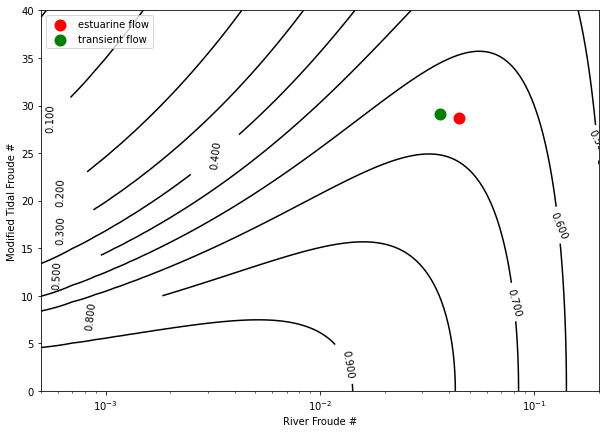

In [32]:
plt.figure(figsize = (10,7))
levels = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
CS = plt.contour(Fr,Ft,x, levels,colors='k')
plt.clabel(CS, fontsize=10)
plt.xscale('log')

plt.scatter(Fr_real, Ft_real,c='r',label='estuarine flow', linewidth =6)
plt.scatter(Fr_tr, Ft_tr,c='g',label='transient flow', linewidth =6)
# for i, txt in enumerate(Qr):
#     plt.annotate(txt, (Fr_cases[i], Ft_mod_cases))
    
plt.xlabel('River Froude #')
plt.ylabel('Modified Tidal Froude #')
plt.legend(loc = 'upper left')
plt.ylim(0,40)

In [33]:
# lets calc what the actual horizontal gradient of depth-averagedsalinity at the estuary mouth is for our system
coeff = [1, 5.31*Fr_real**(2/3), (6.04*Fr_real**(4/3)) + c3*(Ft_real**2)*(Fr_real**(-2/3)), -1]
x_real = np.roots(coeff)[np.isreal(np.roots(coeff))][0]
print(x_real)

coeff = [1, 5.31*Fr_tr**(2/3), (6.04*Fr_tr**(4/3)) + c3*(Ft_tr**2)*(Fr_tr**(-2/3)), -1]
x_tr = np.roots(coeff)[np.isreal(np.roots(coeff))][0]
print(x_tr)

(0.6620782180634349+0j)
(0.6580214065449963+0j)


(0.0005, 0.23)

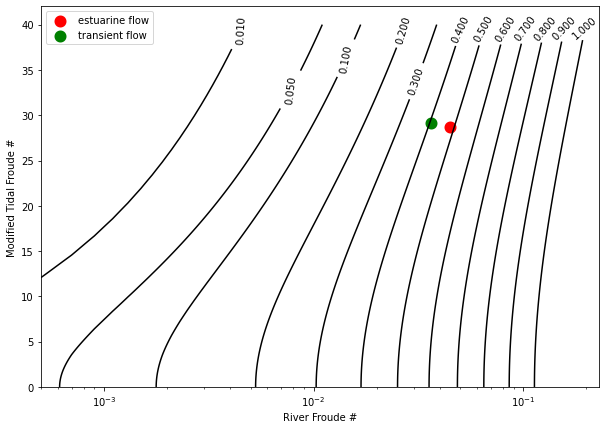

In [34]:
#now lets also remake figure 2 from Guha and Lawrence to see where we stand in that
phi = 7.06*(Fr**(2/3))*(x**2) + 8.82*(Fr**(4/3))*x

plt.figure(figsize = (10,7))
levels = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
CS = plt.contour(Fr,Ft,phi,levels,colors='k')
plt.clabel(CS, fontsize=10)
plt.xscale('log')

plt.scatter(Fr_real, Ft_real,c='r',label='estuarine flow', linewidth = 6)
plt.scatter(Fr_tr, Ft_tr,c='g',label='transient flow', linewidth = 6)
    
plt.xlabel('River Froude #')
plt.ylabel('Modified Tidal Froude #')
plt.legend(loc = 'upper left')
plt.ylim(0,42)
plt.xlim(0.0005,.23)

In [35]:
#lets check our exact phi for our system
7.06*(Fr_real**(2/3))*(x_real**2) + 8.82*(Fr_real**(4/3))*x_real

(0.4826674661507375+0j)

In [36]:
#lets check our exact phi for our system
7.06*(Fr_tr**(2/3))*(x_tr**2) + 8.82*(Fr_tr**(4/3))*x_tr

(0.40500422359625254+0j)

### Reconstruction - to visualise that the classification results oversimplify 
#### Estuarine

In [37]:
nondim_z = np.linspace(-1, 0, 250)
nondim_x = np.linspace(0,-1.5, 250)

Fr = Fr_real
Ft = Ft_real
sigma_x = x_real
c1 = 2.17
c2 = 1.34
c3 = 8.16*10**-5

a = c1*(Fr**(2/3))
b_c = (c2*(Fr**(4/3)))+(c3*(Ft**2)*(Fr**(-2/3)))

sigma = sigma_x**3+a*(sigma_x**2)+b_c*sigma_x
print(sigma)

(0.7771590391483154+0j)


<ipython-input-38-e2baf3170a1e>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma_step[0] = sigma
<ipython-input-38-e2baf3170a1e>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma_step[i+1] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]


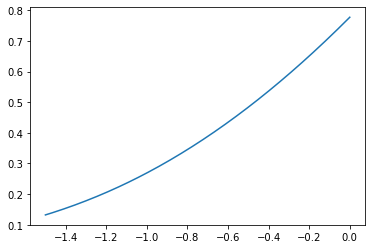

In [38]:
#try to set up loop to solve for sigma at different points upstream of the mouth

sigma_step =  np.empty(np.shape(nondim_x))
sigma_step[0] = sigma
step = 1/(nondim_x[1]-nondim_x[0])
step2 = step**2
step3 = step**3

for i in range(len(sigma_step)-1):
    coeff = [step3, (-3*step3*sigma_step[i])+step2*a, (3*step3*(sigma_step[i]**2))-(2*a*step2*sigma_step[i])+(step*b_c), (-step3*(sigma_step[i]**3))+(step2*a*(sigma_step[i]**2))-(step*b_c*sigma_step[i])-sigma_step[i]]
    sigma_step[i+1] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]


plt.plot(nondim_x, sigma_step)

In [39]:
#setup all the other terms you need to calculate U and salinity
P1 = (3/2)-(3/2)*(nondim_z**2)
P2 = 1-9*(nondim_z**2)-8*(nondim_z**3)
P3 = (-7/120)+(1/4)*(nondim_z**2)-(1/8)*(nondim_z**4)
P4 = (-1/12)+(1/2)*(nondim_z**2)-(3/4)*(nondim_z**4)-(2/5)*(nondim_z**5)

c4 = 0.667
c5 = 47
c6 = 70.5

In [40]:
#make the P values and sigma values into 2D meshes
blankY = np.linspace(1, 0, 250)
blankX = np.linspace(1, 0, 250) #these are just tools used to make the values we want into meshes using meshgrid
x=0
y=0

#want to vary horizontally
sigma_x, y = np.meshgrid(sigma_x, blankY)
sigma_step, y = np.meshgrid(sigma_step, blankY)

#want to vary vertically
x, P1 = np.meshgrid(blankX, P1)
x, P2 = np.meshgrid(blankX, P2)
x, P3 = np.meshgrid(blankX, P3)
x, P4 = np.meshgrid(blankX, P4)

In [41]:
#calculate non dimentional velocity and salinity
U = c4*(Fr**(1/3))*sigma_x*P2 + (Fr*P1)
S = sigma_step + c5*(Fr**(2/3))*(sigma_x**2)*P4 + c6*(Fr**(4/3))*sigma_x*P3

In [42]:
nondim_x, nondim_z = np.meshgrid(nondim_x, nondim_z)

/home/rbeutel/anaconda3/envs/OceanParcels/lib/python3.8/site-packages/numpy/ma/core.py:2825: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


(0.0, -1.5)

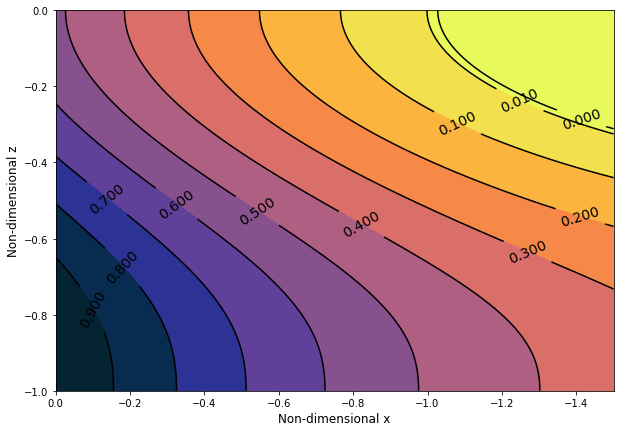

In [43]:
levels = [0,0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9]

plt.figure(figsize = (10,7))
CS = plt.contourf(nondim_x,nondim_z,S,levels, extend='both', cmap = cm.cm.thermal_r)
CS2 = plt.contour(CS,levels, colors='k')
plt.clabel(CS2, fontsize=14)
plt.ylabel('Non-dimensional z', fontsize=12)
plt.xlabel('Non-dimensional x', fontsize=12)
plt.xlim(0,-1.5)

(0.0, -1.5)

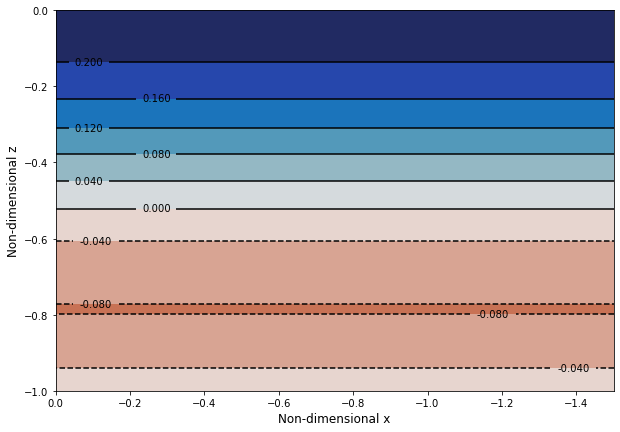

In [44]:
levels = [-0.24,-0.2,-0.16,-0.12,-0.08,-0.04, 0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24]

plt.figure(figsize = (10,7))
CS = plt.contourf(nondim_x,nondim_z,U,levels, extend='both', cmap=cm.cm.balance_r)# vmin=np.min(U), vmax=-1*np.min(U))
CS2 = plt.contour(CS,levels, colors='k')
plt.clabel(CS2, fontsize=10)
plt.ylabel('Non-dimensional z', fontsize=12)
plt.xlabel('Non-dimensional x', fontsize=12)
plt.xlim(0,-1.5)

#### Transient

In [45]:
nondim_z = np.linspace(-1, 0, 250)
nondim_x = np.linspace(0,-1.5, 250)

Fr = Fr_tr
Ft = Ft_tr
sigma_x = x_tr

sigma = sigma_x**3+a*(sigma_x**2)+b_c*sigma_x
print(sigma)

(0.7681432028862171+0j)


<ipython-input-46-3fbe6311c97f>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma_step[0] = sigma
<ipython-input-46-3fbe6311c97f>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma_step[i+1] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]


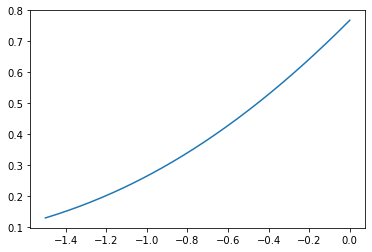

In [46]:
#try to set up loop to solve for sigma at different points upstream of the mouth
sigma_step =  np.empty(np.shape(nondim_x))
sigma_step[0] = sigma
step = 1/(nondim_x[1]-nondim_x[0])
step2 = step**2
step3 = step**3

for i in range(len(sigma_step)-1):
    coeff = [step3, (-3*step3*sigma_step[i])+step2*a, (3*step3*(sigma_step[i]**2))-(2*a*step2*sigma_step[i])+(step*b_c), (-step3*(sigma_step[i]**3))+(step2*a*(sigma_step[i]**2))-(step*b_c*sigma_step[i])-sigma_step[i]]
    sigma_step[i+1] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]


plt.plot(nondim_x, sigma_step)

In [47]:
#setup all the other terms you need to calculate U and salinity
P1 = (3/2)-(3/2)*(nondim_z**2)
P2 = 1-9*(nondim_z**2)-8*(nondim_z**3)
P3 = (-7/120)+(1/4)*(nondim_z**2)-(1/8)*(nondim_z**4)
P4 = (-1/12)+(1/2)*(nondim_z**2)-(3/4)*(nondim_z**4)-(2/5)*(nondim_z**5)

In [48]:
#make the P values and sigma values into 2D meshes
blankY = np.linspace(1, 0, 250)
blankX = np.linspace(1, 0, 250) #these are just tools used to make the values we want into meshes using meshgrid
x=0
y=0

#want to vary horizontally
sigma_x, y = np.meshgrid(sigma_x, blankY)
sigma_step, y = np.meshgrid(sigma_step, blankY)

#want to vary vertically
x, P1 = np.meshgrid(blankX, P1)
x, P2 = np.meshgrid(blankX, P2)
x, P3 = np.meshgrid(blankX, P3)
x, P4 = np.meshgrid(blankX, P4)

In [49]:
#calculate non dimentional velocity and salinity
U = c4*(Fr**(1/3))*sigma_x*P2 + (Fr*P1)
S = sigma_step + c5*(Fr**(2/3))*(sigma_x**2)*P4 + c6*(Fr**(4/3))*sigma_x*P3

In [50]:
nondim_x, nondim_z = np.meshgrid(nondim_x, nondim_z)

/home/rbeutel/anaconda3/envs/OceanParcels/lib/python3.8/site-packages/numpy/ma/core.py:2825: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


(0.0, -1.5)

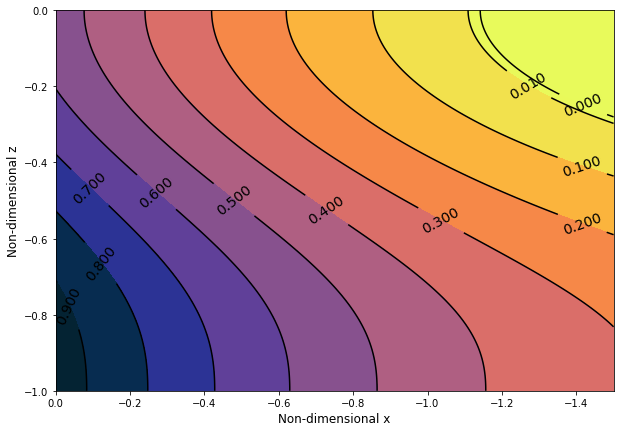

In [51]:
levels = [0,0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9]

plt.figure(figsize = (10,7))
CS = plt.contourf(nondim_x,nondim_z,S,levels, extend='both', cmap = cm.cm.thermal_r)
CS2 = plt.contour(CS,levels, colors='k')
plt.clabel(CS2, fontsize=14)
plt.ylabel('Non-dimensional z', fontsize=12)
plt.xlabel('Non-dimensional x', fontsize=12)
plt.xlim(0,-1.5)

(0.0, -1.5)

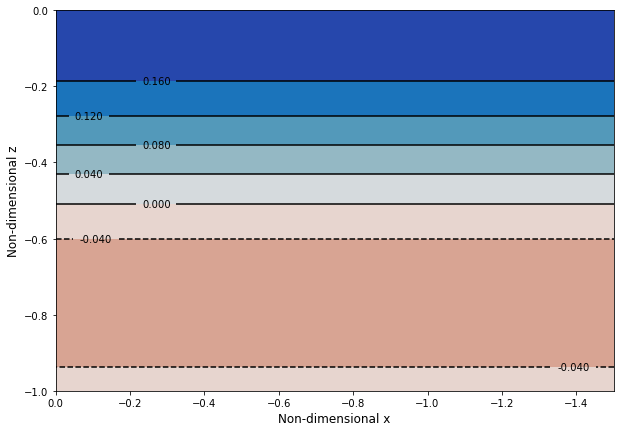

In [52]:
levels = [-0.24,-0.2,-0.16,-0.12,-0.08,-0.04, 0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24]

plt.figure(figsize = (10,7))
CS = plt.contourf(nondim_x,nondim_z,U,levels, extend='both', cmap=cm.cm.balance_r)# vmin=np.min(U), vmax=-1*np.min(U))
CS2 = plt.contour(CS,levels, colors='k')
plt.clabel(CS2, fontsize=10)
plt.ylabel('Non-dimensional z', fontsize=12)
plt.xlabel('Non-dimensional x', fontsize=12)
plt.xlim(0,-1.5)